# Plot panel of Gregory plot for each model with fixed-SST forcing

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
from estimation import *
from plotting_functions import *


In [2]:
exp = 'abrupt-4xCO2'

# load fixed-SST forcings
fixedSSTforcingfile = '../Estimates/fixed_SST_forcing_estimates.csv'
fSSTf_df = pd.read_csv(fixedSSTforcingfile, index_col=0)
models = fSSTf_df.index.drop_duplicates()
models # with at least one fixed-SST estimate available for the 4xCO2 forcing

Index(['ACCESS-CM2', 'ACCESS-ESM1-5', 'CESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
       'CanESM5', 'EC-Earth3', 'GFDL-CM4', 'GFDL-ESM4', 'GISS-E2-1-G',
       'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MIROC6', 'MPI-ESM1-2-LR',
       'MRI-ESM2-0', 'NorESM2-LM', 'NorESM2-MM', 'UKESM1-0-LL'],
      dtype='object')

## Test code for one model first:

In [3]:
model = models[9]
model

'GISS-E2-1-G'

In [8]:
members = find_members(model,exp)
if model == 'GISS-E2-1-G':
    # exclude member which seems to start after year 150
    members.remove('r1i1p1f3')
members


['r102i1p1f1', 'r1i1p1f1', 'r1i1p3f1', 'r1i1p5f1']

Fixed-SST forcing for member r1i1p1f2 is 7.273 W/m^2
Fixed-SST forcing for member r1i1p1f1 is 7.362 W/m^2
r102i1p1f1
r1i1p1f1
r1i1p3f1
r1i1p5f1


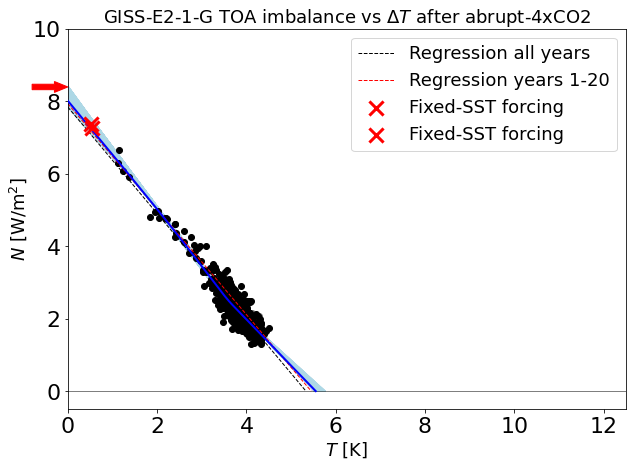

In [11]:
# Gregory plot with all available 4xCO2 data
fig, ax = plt.subplots(figsize = [10,7])
ax.set_xlim(0,12.5)
ax.set_ylim(-0.5, 10)

# year 1-150
gF2x, gT2x, linfit = Gregory_linreg(model, exp, members, stopyear = 1000)
ax.plot([0, gT2x*2], linfit,'--',linewidth=1,color = "black", zorder = 2, label = 'Regression all years')
#year 1-20
gF2x, gT2x, linfit = Gregory_linreg(model, exp, members, startyear=1,stopyear=20)
ax.plot([0, gT2x*2], linfit,'--',linewidth=1,color = "red", zorder = 2, label = 'Regression years 1-20')

fixedSSTestimate4xCO2(model, members, plotting_axis = ax)
forcing_smith(model, plotting_axis = ax)
#ax.text('Fixed-SST forcing estimate', )
ax.legend(fontsize = 18)

ax.set_xlabel('$T$ [K]', fontsize = 18)
ax.set_ylabel('$N$ [W/m$^2$]', fontsize = 18)
ax.set_title(model + ' TOA imbalance vs $\Delta T$ after abrupt-4xCO2',fontsize = 18)
#ax.grid()
ax.axhline(0, color='k', linewidth = 0.5) # horizontal lines
ax.tick_params(axis='both',labelsize=22)

for member in members:
    print(member)
    data = load_anom(model, exp, member, length_restriction = None)
    deltaN = data['rsdt'] - data['rsut'] - data['rlut']
    deltaT = data['tas']

    ax.scatter(deltaT[:150], deltaN[:150], linewidth=1, color = "black", zorder = 2)
    ax.scatter(deltaT[150:], deltaN[150:], linewidth=1, color = "gray", zorder = 1)
    
# include 1000 fits
filename = model + '_1000parameters.csv'
df_par = pd.read_csv('../Estimates/1000parameters_4xCO2_allmembers/' + filename, index_col=0)
N = len(df_par)    

#years = np.arange(1,150+1); years0 = np.concatenate(([0],years))
years0 = np.arange(0,150+1)

best_rnorm = np.min(df_par['rnorm']);
for ii in range(N):
    # load parameters from dataframe:
    taulist = np.array(df_par.loc[ii,'tau1':'tau4'])
    a_n = np.array(df_par.loc[ii,'a_1':'a_4'])
    b_n = np.array(df_par.loc[ii,'b_1':'b_4'])
    F2x = df_par.loc[ii,'F2x']
    T2x = df_par.loc[ii,'T2x']
    rnorm = df_par.loc[ii,'rnorm']
    
    dim = len(taulist) 
    tas_pred = tas_predictors(years0, taulist)
    toarad_pred = toarad_predictors(years0, taulist)
    Tsum = tas_pred@a_n # sum of all components
    Nsum = toarad_pred@b_n
    
    # add extra point in equilibrium:
    Tsumext = np.append(Tsum, 2*T2x)
    Nsumext = np.append(Nsum, 0)
    
    if rnorm == best_rnorm: # best estimate
        ax.plot(Tsumext, Nsumext, linewidth=2, color = "blue", zorder=3);
    else: 
        ax.plot(Tsumext, Nsumext, linewidth=1, color = "lightblue", zorder=1);

#plt.savefig('../Figures/TOAimbvsT_withfixedSSTforcing_CESM2.pdf', format='pdf', dpi=600, bbox_inches="tight")


## Loop through all models

ACCESS-CM2 ['r1i1p1f1']
Fixed-SST forcing for member r1i1p1f1 is 7.951 W/m^2
ACCESS-ESM1-5 ['r1i1p1f1', 'r2i1p1f1']
Fixed-SST forcing for member r1i1p1f1 is 7.04 W/m^2
CESM2 ['r1i1p1f1']
Fixed-SST forcing for member r1i1p1f1 is 8.898 W/m^2
CNRM-CM6-1 ['r1i1p1f2', 'r2i1p1f2', 'r3i1p1f2', 'r4i1p1f2', 'r5i1p1f2', 'r6i1p1f2']
Fixed-SST forcing for member r1i1p1f2 is 7.985 W/m^2
CNRM-ESM2-1 ['r1i1p1f2', 'r2i1p1f2', 'r3i1p1f2']
Fixed-SST forcing for member r1i1p1f2 is 7.642 W/m^2
CanESM5 ['r1i1p1f1', 'r1i1p2f1']
Fixed-SST forcing for member r1i1p2f1 is 7.605 W/m^2
EC-Earth3 ['r3i1p1f1', 'r8i1p1f1']
Fixed-SST forcing for member r1i1p1f1 is 8.094 W/m^2
GFDL-CM4 ['r1i1p1f1']
Fixed-SST forcing for member r1i1p1f1 is 8.234 W/m^2
GFDL-ESM4 ['r1i1p1f1']
Fixed-SST forcing for member r1i1p1f1 is 7.735 W/m^2
GISS-E2-1-G ['r102i1p1f1', 'r1i1p1f1', 'r1i1p3f1', 'r1i1p5f1']
Fixed-SST forcing for member r1i1p1f2 is 7.273 W/m^2
Fixed-SST forcing for member r1i1p1f1 is 7.362 W/m^2
HadGEM3-GC31-LL ['r1i1p1f3'

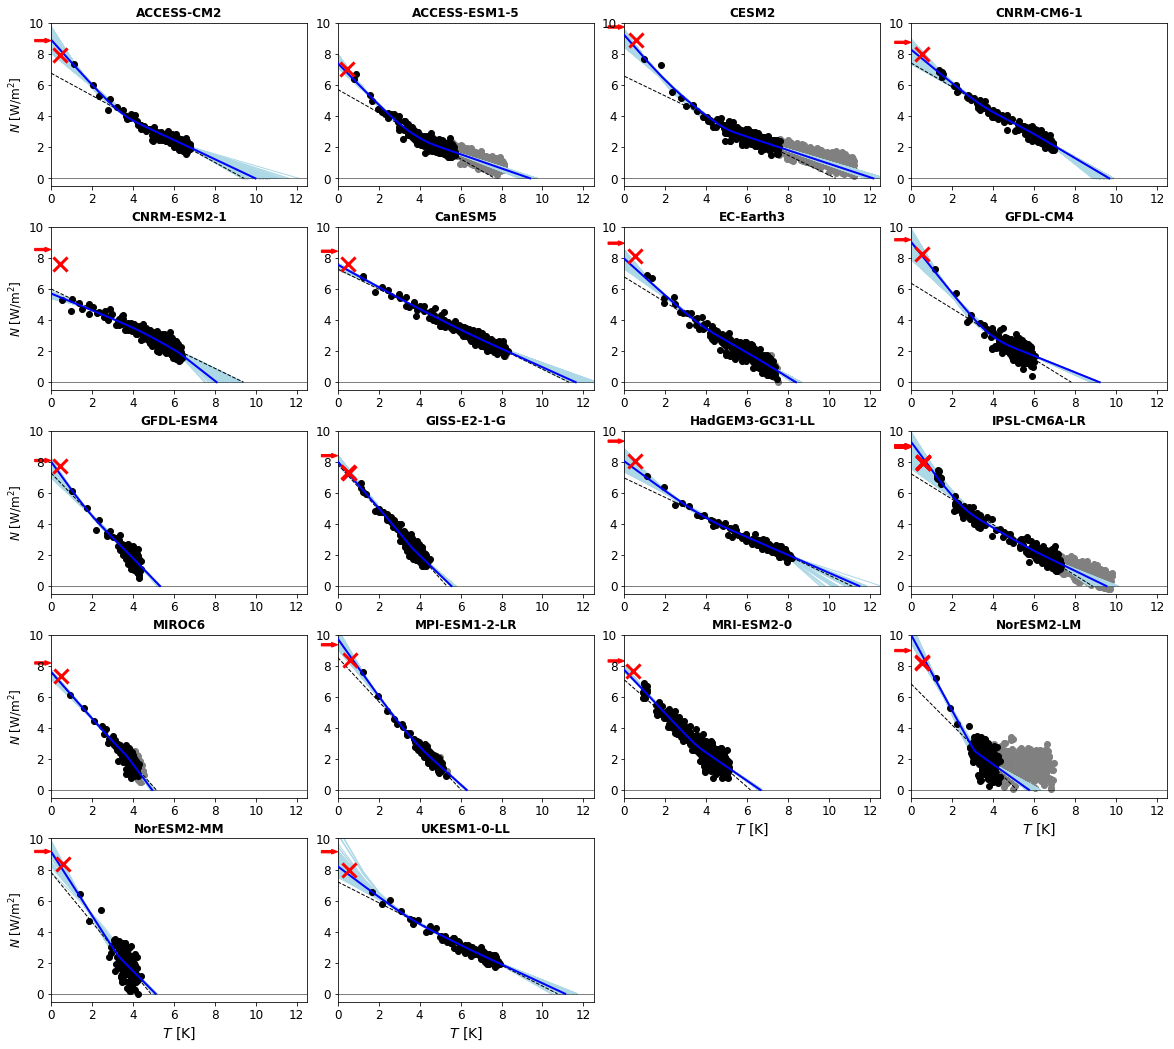

In [13]:
fig, axes = plt.subplots(ncols = 4, nrows = 5, figsize = (20,18))
axes = np.concatenate(axes)

years0 = np.arange(0,150+1)

for (j, model) in enumerate(models):
    ax = axes[j]
    if j in [16,17,14,15]:
        ax.set_xlabel('$T$ [K]', fontsize = 14)
    if j in [0,4,8,12,16]:
        ax.set_ylabel('$N$ [W/m$^2$]', fontsize = 12)
    ax.tick_params(axis='both', labelsize = 12)
    ax.set_title(model, fontweight = 'bold')
    ax.axhline(0, color='k', linewidth = 0.5) # horizontal lines
    ax.set_xlim(0,12.5)
    ax.set_ylim(-0.5,10);
    
    members = find_members(model,exp)
    if model == 'GISS-E2-1-G':
        # exclude member which seems to start after year 150
        members.remove('r1i1p1f3')
    print(model, members)
    
    gF2x, gT2x, linfit = Gregory_linreg(model, exp, members)
    ax.plot([0, gT2x*2], linfit,'--',linewidth=1,color = "black", zorder = 2)
    fixedSSTestimate4xCO2(model, members, plotting_axis = ax)
    forcing_smith(model, plotting_axis = ax)
    
    for member in members:
        data = load_anom(model, exp, member, length_restriction = None)
        deltaN = data['rsdt'] - data['rsut'] - data['rlut']
        deltaT = data['tas']

        ax.scatter(deltaT[:150], deltaN[:150], linewidth=1, color = "black", zorder = 2)
        ax.scatter(deltaT[150:], deltaN[150:], linewidth=1, color = "gray", zorder = 1)

    # include 1000 fits
    filename = model + '_1000parameters.csv'
    df_par = pd.read_csv('../Estimates/1000parameters_4xCO2_allmembers/' + filename,index_col=0)
    N = len(df_par)    
    years0 = np.arange(0,150+1)

    best_rnorm = np.min(df_par['rnorm']);
    for ii in range(N):
        # load parameters from dataframe:
        taulist = np.array(df_par.loc[ii,'tau1':'tau4'])
        a_n = np.array(df_par.loc[ii,'a_1':'a_4'])
        b_n = np.array(df_par.loc[ii,'b_1':'b_4'])
        F2x = df_par.loc[ii,'F2x']
        T2x = df_par.loc[ii,'T2x']
        rnorm = df_par.loc[ii,'rnorm']

        dim = len(taulist) 
        tas_pred = tas_predictors(years0, taulist)
        toarad_pred = toarad_predictors(years0, taulist)
        Tsum = tas_pred@a_n # sum of all components
        Nsum = toarad_pred@b_n

        # add extra point in equilibrium:
        Tsumext = np.append(Tsum, 2*T2x)
        Nsumext = np.append(Nsum, 0)

        if rnorm == best_rnorm: # best estimate
            ax.plot(Tsumext, Nsumext, linewidth=2, color = "blue", zorder=3);
        else: 
            ax.plot(Tsumext, Nsumext, linewidth=1, color = "lightblue", zorder=1);

fig.delaxes(axes[-1]); fig.delaxes(axes[-2]); 
#plt.subplots_adjust(hspace=0.3, wspace = 0.15)
plt.subplots_adjust(hspace=0.25, wspace = 0.12)
plt.savefig('../Figures/TOAimbvsT_withfixedSSTforcing_allmembers_inclERFtrop.pdf', format='pdf', dpi=600, bbox_inches="tight")
plt.show()

# Plot panel of Gregory plot for each model without fixed-SST forcing

In [14]:
models_with_fsstforcing = models
models_with_fsstforcing

Index(['ACCESS-CM2', 'ACCESS-ESM1-5', 'CESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
       'CanESM5', 'EC-Earth3', 'GFDL-CM4', 'GFDL-ESM4', 'GISS-E2-1-G',
       'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MIROC6', 'MPI-ESM1-2-LR',
       'MRI-ESM2-0', 'NorESM2-LM', 'NorESM2-MM', 'UKESM1-0-LL'],
      dtype='object')

In [15]:
# find all models with anomalies computed for an abrupt-4xCO2 experiment

model_anom_names = [ f.name for f in os.scandir('../Processed_data/Global_annual_anomalies/') if f.is_dir() and f.name not in ['.ipynb_checkpoints', '.DS_Store']]
models_without_fsstforcing = []
for model in model_anom_names:
    if model not in models_with_fsstforcing:
        anom_exp = [ f.name for f in os.scandir('../Processed_data/Global_annual_anomalies/' + model) if f.is_dir() and f.name not in ['.ipynb_checkpoints', '.DS_Store']]
        if 'abrupt-4xCO2' in anom_exp:
            models_without_fsstforcing.append(model)

models_without_fsstforcing.sort()
models_without_fsstforcing.remove('CIESM')
models_without_fsstforcing.remove('CAS-ESM2-0')
models_without_fsstforcing.remove('MIROC-ES2H')
print(len(models_without_fsstforcing), 'models:')
models_without_fsstforcing

33 models:


['AWI-CM-1-1-MR',
 'BCC-CSM2-MR',
 'BCC-ESM1',
 'CAMS-CSM1-0',
 'CESM2-FV2',
 'CESM2-WACCM',
 'CESM2-WACCM-FV2',
 'CMCC-CM2-SR5',
 'CMCC-ESM2',
 'CNRM-CM6-1-HR',
 'E3SM-1-0',
 'EC-Earth3-AerChem',
 'EC-Earth3-CC',
 'EC-Earth3-Veg',
 'FGOALS-f3-L',
 'FGOALS-g3',
 'GISS-E2-1-H',
 'GISS-E2-2-G',
 'GISS-E2-2-H',
 'HadGEM3-GC31-MM',
 'ICON-ESM-LR',
 'IITM-ESM',
 'INM-CM4-8',
 'INM-CM5-0',
 'IPSL-CM5A2-INCA',
 'KIOST-ESM',
 'MIROC-ES2L',
 'MPI-ESM-1-2-HAM',
 'MPI-ESM1-2-HR',
 'NESM3',
 'NorCPM1',
 'SAM0-UNICON',
 'TaiESM1']

### Since they are so many, make two figures:

In [16]:
model_group1 = models_without_fsstforcing[:16]
model_group2 = models_without_fsstforcing[16:]
len(model_group1)
len(model_group2)

17

### Loop through model group 1

available members for model AWI-CM-1-1-MR ['r1i1p1f1']
available members for model BCC-CSM2-MR ['r1i1p1f1']
available members for model BCC-ESM1 ['r1i1p1f1']
available members for model CAMS-CSM1-0 ['r1i1p1f1', 'r2i1p1f1']
available members for model CESM2-FV2 ['r1i1p1f1']
available members for model CESM2-WACCM ['r1i1p1f1']
available members for model CESM2-WACCM-FV2 ['r1i1p1f1']
available members for model CMCC-CM2-SR5 ['r1i1p1f1']
available members for model CMCC-ESM2 ['r1i1p1f1']
available members for model CNRM-CM6-1-HR ['r1i1p1f2']
available members for model E3SM-1-0 ['r1i1p1f1']
available members for model EC-Earth3-AerChem ['r1i1p1f1']
available members for model EC-Earth3-CC ['r1i1p1f1']
available members for model EC-Earth3-Veg ['r1i1p1f1']
available members for model FGOALS-f3-L ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1']
available members for model FGOALS-g3 ['r1i1p1f1']


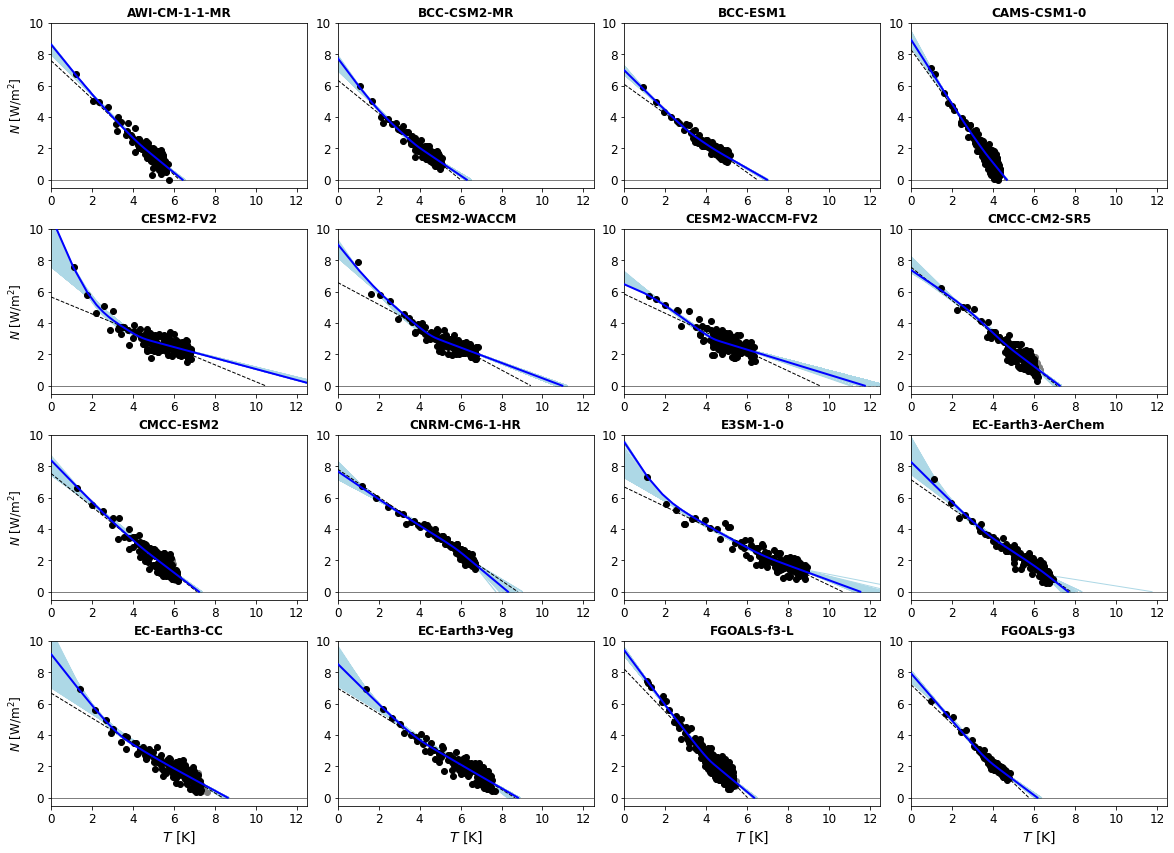

In [17]:
fig, axes = plt.subplots(ncols = 4, nrows = 4, figsize = (20,18/5*4))
axes = np.concatenate(axes)

years = np.arange(1,150+1); years0 = np.concatenate(([0],years))
timepoints = np.arange(0,151)

for (j, model) in enumerate(model_group1):
    ax = axes[j]
    if j in [12,13,14,15]:
        ax.set_xlabel('$T$ [K]', fontsize = 14)
    if j in [0,4,8,12]:
        ax.set_ylabel('$N$ [W/m$^2$]', fontsize = 12)
    ax.tick_params(axis='both', labelsize = 12)
    ax.set_title(model, fontweight = 'bold')
    ax.axhline(0, color='k', linewidth = 0.5) # horizontal lines
    ax.set_xlim(0,12.5)
    ax.set_ylim(-0.5,10);
    
    members = find_members(model, exp)
    print('available members for model', model, members)
    
    gF2x, gT2x, linfit = Gregory_linreg(model, exp, members)
    ax.plot([0, gT2x*2], linfit,'--',linewidth=1,color = "black", zorder = 2)

    for member in members:
        data = load_anom(model, exp, member, length_restriction = None)
        deltaN = data['rsdt'] - data['rsut'] - data['rlut']
        deltaT = data['tas']

        ax.scatter(deltaT[:150], deltaN[:150], linewidth=1, color = "black", zorder = 2)
        ax.scatter(deltaT[150:], deltaN[150:], linewidth=1, color = "gray", zorder = 1)

    # include 1000 fits
    filename = model + '_1000parameters.csv'
    df_par = pd.read_csv('../Estimates/1000parameters_4xCO2_allmembers/' + filename,index_col=0)
    N = len(df_par)    
    years0 = np.arange(0,150+1)

    best_rnorm = np.min(df_par['rnorm']);
    for ii in range(N):
        # load parameters from dataframe:
        taulist = np.array(df_par.loc[ii,'tau1':'tau4'])
        a_n = np.array(df_par.loc[ii,'a_1':'a_4'])
        b_n = np.array(df_par.loc[ii,'b_1':'b_4'])
        F2x = df_par.loc[ii,'F2x']
        T2x = df_par.loc[ii,'T2x']
        rnorm = df_par.loc[ii,'rnorm']

        dim = len(taulist) 
        tas_pred = tas_predictors(years0, taulist)
        toarad_pred = toarad_predictors(years0, taulist)
        Tsum = tas_pred@a_n # sum of all components
        Nsum = toarad_pred@b_n

        # add extra point in equilibrium:
        Tsumext = np.append(Tsum, 2*T2x)
        Nsumext = np.append(Nsum, 0)

        if rnorm == best_rnorm: # best estimate
            ax.plot(Tsumext, Nsumext, linewidth=2, color = "blue", zorder=3);
        else: 
            ax.plot(Tsumext, Nsumext, linewidth=1, color = "lightblue", zorder=1);

#plt.subplots_adjust(hspace=0.3, wspace = 0.15)
plt.subplots_adjust(hspace=0.25, wspace = 0.12)
plt.savefig('../Figures/TOAimbvsT_withoutfixedSSTforcing_group1_allmembers.pdf', format='pdf', dpi=600, bbox_inches="tight")
plt.show()

### Loop through model group 2

available members for model GISS-E2-1-H ['r1i1p1f1', 'r1i1p3f1', 'r1i1p5f1']
available members for model GISS-E2-2-G ['r1i1p1f1']
available members for model GISS-E2-2-H ['r1i1p1f1']
available members for model HadGEM3-GC31-MM ['r1i1p1f3']
available members for model ICON-ESM-LR ['r1i1p1f1']
available members for model IITM-ESM ['r1i1p1f1']
available members for model INM-CM4-8 ['r1i1p1f1']
available members for model INM-CM5-0 ['r1i1p1f1']
available members for model IPSL-CM5A2-INCA ['r1i1p1f1']
available members for model KIOST-ESM ['r1i1p1f1']
available members for model MIROC-ES2L ['r1i1p1f2']
available members for model MPI-ESM-1-2-HAM ['r1i1p1f1']
available members for model MPI-ESM1-2-HR ['r1i1p1f1']
available members for model NESM3 ['r1i1p1f1']
available members for model NorCPM1 ['r1i1p1f1']
available members for model SAM0-UNICON ['r1i1p1f1']
available members for model TaiESM1 ['r1i1p1f1']


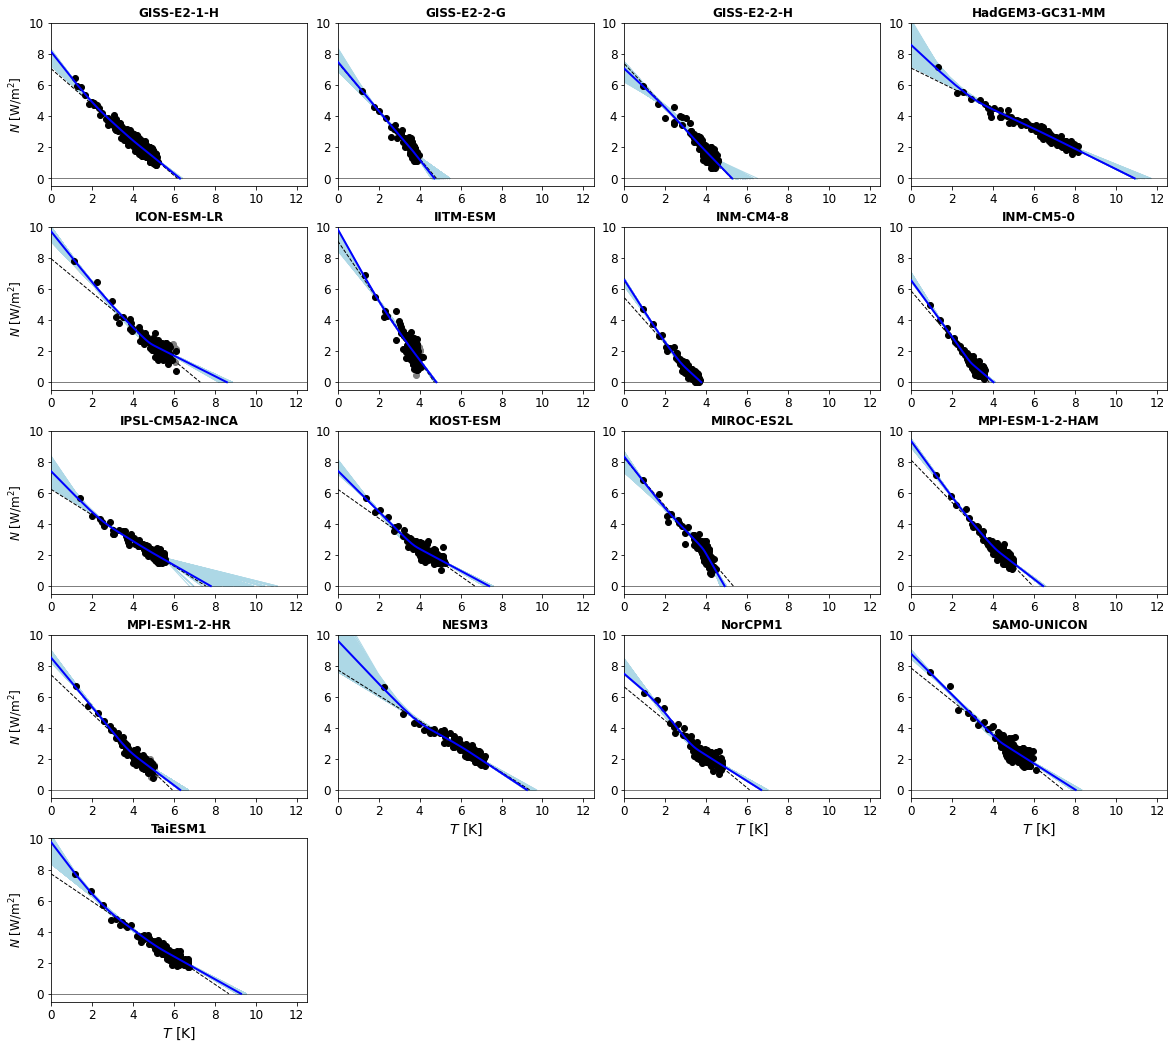

In [18]:

fig, axes = plt.subplots(ncols = 4, nrows = 5, figsize = (20,18))
axes = np.concatenate(axes)

for (j, model) in enumerate(model_group2):
    ax = axes[j]
    if j in [16,13,14,15]:
        ax.set_xlabel('$T$ [K]', fontsize = 14)
    if j in [0,4,8,12,16]:
        ax.set_ylabel('$N$ [W/m$^2$]', fontsize = 12)
    ax.tick_params(axis='both', labelsize = 12)
    ax.set_title(model, fontweight = 'bold')
    ax.axhline(0, color='k', linewidth = 0.5) # horizontal lines
    ax.set_xlim(0,12.5)
    ax.set_ylim(-0.5,10);

    members = find_members(model, exp)
    print('available members for model', model, members)
    
    gF2x, gT2x, linfit = Gregory_linreg(model, exp, members)
    ax.plot([0, gT2x*2], linfit,'--',linewidth=1,color = "black", zorder = 2)

    for member in members:
        data = load_anom(model, exp, member, length_restriction = None)
        deltaN = data['rsdt'] - data['rsut'] - data['rlut']
        deltaT = data['tas']

        ax.scatter(deltaT[:150], deltaN[:150], linewidth=1, color = "black", zorder = 2)
        ax.scatter(deltaT[150:], deltaN[150:], linewidth=1, color = "gray", zorder = 1)

    # include 1000 fits
    filename = model + '_1000parameters.csv'
    df_par = pd.read_csv('../Estimates/1000parameters_4xCO2_allmembers/' + filename,index_col=0)
    N = len(df_par)    
    years0 = np.arange(0,150+1)

    best_rnorm = np.min(df_par['rnorm']);
    for ii in range(N):
        # load parameters from dataframe:
        taulist = np.array(df_par.loc[ii,'tau1':'tau4'])
        a_n = np.array(df_par.loc[ii,'a_1':'a_4'])
        b_n = np.array(df_par.loc[ii,'b_1':'b_4'])
        F2x = df_par.loc[ii,'F2x']
        T2x = df_par.loc[ii,'T2x']
        rnorm = df_par.loc[ii,'rnorm']

        dim = len(taulist) 
        tas_pred = tas_predictors(years0, taulist)
        toarad_pred = toarad_predictors(years0, taulist)
        Tsum = tas_pred@a_n # sum of all components
        Nsum = toarad_pred@b_n

        # add extra point in equilibrium:
        Tsumext = np.append(Tsum, 2*T2x)
        Nsumext = np.append(Nsum, 0)

        if rnorm == best_rnorm: # best estimate
            ax.plot(Tsumext, Nsumext, linewidth=2, color = "blue", zorder=3);
        else: 
            ax.plot(Tsumext, Nsumext, linewidth=1, color = "lightblue", zorder=1);

    

fig.delaxes(axes[-1]); fig.delaxes(axes[-2]);  fig.delaxes(axes[-3]); 
#plt.subplots_adjust(hspace=0.3, wspace = 0.15)
plt.subplots_adjust(hspace=0.25, wspace = 0.12)
plt.savefig('../Figures/TOAimbvsT_withoutfixedSSTforcing_group2_allmembers.pdf', format='pdf', dpi=600, bbox_inches="tight")
plt.show()

# Make similar figures for abrupt 2xCO2 and 0p5xCO2

In [19]:
exp = 'abrupt-2xCO2'
best_parameters = pd.read_csv('../Estimates/best_estimated_parameters_allmembers2xCO2.csv', index_col=0)
models = list(best_parameters.index)
models

['CESM2',
 'CNRM-CM6-1',
 'CanESM5',
 'GISS-E2-1-G',
 'GISS-E2-1-H',
 'GISS-E2-2-G',
 'GISS-E2-2-H',
 'IPSL-CM6A-LR',
 'MIROC6',
 'MRI-ESM2-0',
 'TaiESM1',
 'HadGEM3-GC31-LL']

CESM2 ['r1i1p1f1']
CNRM-CM6-1 ['r1i1p1f2']
CanESM5 ['r1i1p2f1']
GISS-E2-1-G ['r102i1p1f1', 'r1i1p1f1', 'r1i1p3f1', 'r1i1p5f1']
GISS-E2-1-H ['r1i1p1f1', 'r1i1p5f1']
GISS-E2-2-G ['r1i1p1f1']
GISS-E2-2-H ['r1i1p1f1']
IPSL-CM6A-LR ['r1i1p1f1']
MIROC6 ['r1i1p1f1']
MRI-ESM2-0 ['r1i1p1f1']
TaiESM1 ['r1i1p1f1']
HadGEM3-GC31-LL ['r1i1p1f3']


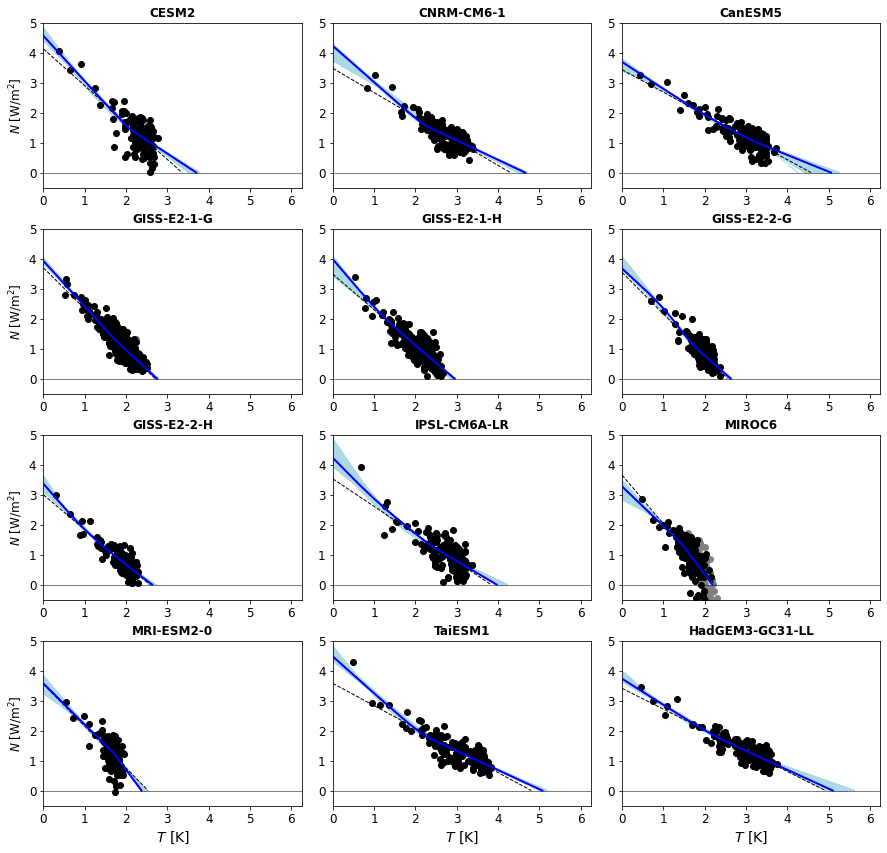

In [20]:
fig, axes = plt.subplots(ncols = 3, nrows = 4, figsize = (20/4*3,18/5*4))
axes = np.concatenate(axes)

years0 = np.arange(0,150+1)

for (j, model) in enumerate(models):
    ax = axes[j]
    if j in [9,10,11]:
        ax.set_xlabel('$T$ [K]', fontsize = 14)
    if j in [0,3,6,9]:
        ax.set_ylabel('$N$ [W/m$^2$]', fontsize = 12)
    ax.tick_params(axis='both', labelsize = 12)
    ax.set_title(model, fontweight = 'bold')
    ax.axhline(0, color='k', linewidth = 0.5) # horizontal lines
    ax.set_xlim(0,12.5/2)
    ax.set_ylim(-0.5,10/2);
    
    members = find_members(model,exp)
    print(model, members)
    
    gF2x, gT2x, linfit = Gregory_linreg(model, exp, members)
    ax.plot([0, gT2x], linfit,'--',linewidth=1,color = "black", zorder = 2)
    
    for member in members:
        data = load_anom(model, exp, member, length_restriction = None)
        deltaN = data['rsdt'] - data['rsut'] - data['rlut']
        deltaT = data['tas']
        ax.scatter(deltaT[:150], deltaN[:150], linewidth=1, color = "black", zorder = 2)
        ax.scatter(deltaT[150:], deltaN[150:], linewidth=1, color = "gray", zorder = 1)

    # include 1000 fits
    filename = model + '_1000parameters.csv'
    df_par = pd.read_csv('../Estimates/1000parameters_2xCO2_allmembers/' + filename,index_col=0)
    N = len(df_par)    
    years0 = np.arange(0,150+1)

    best_rnorm = np.min(df_par['rnorm']);
    for ii in range(N):
        # load parameters from dataframe:
        taulist = np.array(df_par.loc[ii,'tau1':'tau4'])
        a_n = np.array(df_par.loc[ii,'a_1':'a_4'])
        b_n = np.array(df_par.loc[ii,'b_1':'b_4'])
        F2x = df_par.loc[ii,'F2x']
        T2x = df_par.loc[ii,'T2x']
        rnorm = df_par.loc[ii,'rnorm']

        dim = len(taulist) 
        tas_pred = tas_predictors(years0, taulist)
        toarad_pred = toarad_predictors(years0, taulist)
        Tsum = tas_pred@a_n # sum of all components
        Nsum = toarad_pred@b_n

        # add extra point in equilibrium:
        if exp == 'abrupt-4xCO2':
            Tsumext = np.append(Tsum, 2*T2x)
        else:
            Tsumext = np.append(Tsum, T2x)
        Nsumext = np.append(Nsum, 0)

        if rnorm == best_rnorm: # best estimate
            ax.plot(Tsumext, Nsumext, linewidth=2, color = "blue", zorder=3);
        else: 
            ax.plot(Tsumext, Nsumext, linewidth=1, color = "lightblue", zorder=1);

plt.subplots_adjust(hspace=0.25, wspace = 0.12)
plt.savefig('../Figures/TOAimbvsT_allmembers2xCO2.pdf', format='pdf', dpi=600, bbox_inches="tight")
plt.show()

In [21]:
exp = 'abrupt-0p5xCO2'
best_parameters = pd.read_csv('../Estimates/best_estimated_parameters_allmembers0p5xCO2.csv', index_col=0)
models = list(best_parameters.index)
models

['CESM2',
 'CNRM-CM6-1',
 'CanESM5',
 'GISS-E2-1-G',
 'IPSL-CM6A-LR',
 'MIROC6',
 'MRI-ESM2-0',
 'TaiESM1',
 'HadGEM3-GC31-LL']

CESM2 ['r1i1p1f1']
CNRM-CM6-1 ['r1i1p1f2']
CanESM5 ['r1i1p2f1']
GISS-E2-1-G ['r1i1p1f1']
IPSL-CM6A-LR ['r1i1p1f1']
MIROC6 ['r1i1p1f1']
MRI-ESM2-0 ['r1i1p1f1']
TaiESM1 ['r1i1p1f1']
HadGEM3-GC31-LL ['r1i1p1f3']


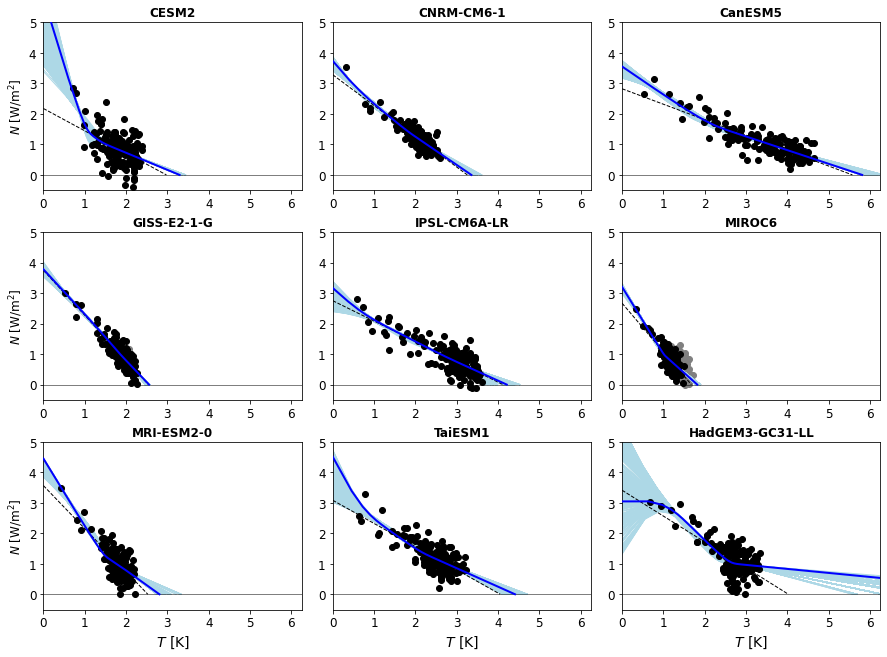

In [22]:
fig, axes = plt.subplots(ncols = 3, nrows = 3, figsize = (20/4*3,18/5*3))
axes = np.concatenate(axes)

years0 = np.arange(0,150+1)

for (j, model) in enumerate(models):
    ax = axes[j]
    if j in [6,7,8]:
        ax.set_xlabel('$T$ [K]', fontsize = 14)
    if j in [0,3,6]:
        ax.set_ylabel('$N$ [W/m$^2$]', fontsize = 12)
    ax.tick_params(axis='both', labelsize = 12)
    ax.set_title(model, fontweight = 'bold')
    ax.axhline(0, color='k', linewidth = 0.5) # horizontal lines
    ax.set_xlim(0,12.5/2)
    ax.set_ylim(-0.5,10/2);
    
    members = find_members(model,exp)
    print(model, members)
    
    gF2x, gT2x, linfit = Gregory_linreg(model, exp, members)
    ax.plot([0, gT2x], linfit,'--',linewidth=1,color = "black", zorder = 2)
    
    for member in members:
        data = load_anom(model, exp, member, length_restriction = None)
        deltaN = data['rsdt'] - data['rsut'] - data['rlut']
        deltaT = data['tas']
        deltaN *= -1; deltaT *= -1
        ax.scatter(deltaT[:150], deltaN[:150], linewidth=1, color = "black", zorder = 2)
        ax.scatter(deltaT[150:], deltaN[150:], linewidth=1, color = "gray", zorder = 1)

    # include 1000 fits
    filename = model + '_1000parameters.csv'
    df_par = pd.read_csv('../Estimates/1000parameters_0p5xCO2_allmembers/' + filename,index_col=0)
    N = len(df_par)    
    years0 = np.arange(0,150+1)

    best_rnorm = np.min(df_par['rnorm']);
    for ii in range(N):
        # load parameters from dataframe:
        taulist = np.array(df_par.loc[ii,'tau1':'tau4'])
        a_n = np.array(df_par.loc[ii,'a_1':'a_4'])
        b_n = np.array(df_par.loc[ii,'b_1':'b_4'])
        F2x = df_par.loc[ii,'F2x']
        T2x = df_par.loc[ii,'T2x']
        rnorm = df_par.loc[ii,'rnorm']

        dim = len(taulist) 
        tas_pred = tas_predictors(years0, taulist)
        toarad_pred = toarad_predictors(years0, taulist)
        Tsum = tas_pred@a_n # sum of all components
        Nsum = toarad_pred@b_n

        # add extra point in equilibrium:
        if exp == 'abrupt-4xCO2':
            Tsumext = np.append(Tsum, 2*T2x)
        else:
            Tsumext = np.append(Tsum, T2x)
        Nsumext = np.append(Nsum, 0)

        if rnorm == best_rnorm: # best estimate
            ax.plot(Tsumext, Nsumext, linewidth=2, color = "blue", zorder=3);
        else: 
            ax.plot(Tsumext, Nsumext, linewidth=1, color = "lightblue", zorder=1);

plt.subplots_adjust(hspace=0.25, wspace = 0.12)
plt.savefig('../Figures/TOAimbvsT_allmembers0p5xCO2.pdf', format='pdf', dpi=600, bbox_inches="tight")
plt.show()

# Repeat 2xCO2 figure, but include abrupt-4xCO2 experiments

CESM2 ['r1i1p1f1']
available members for model CESM2 ['r1i1p1f1']
CNRM-CM6-1 ['r1i1p1f2']
available members for model CNRM-CM6-1 ['r1i1p1f2', 'r2i1p1f2', 'r3i1p1f2', 'r4i1p1f2', 'r5i1p1f2', 'r6i1p1f2']
CanESM5 ['r1i1p2f1']
available members for model CanESM5 ['r1i1p1f1', 'r1i1p2f1']
GISS-E2-1-G ['r102i1p1f1', 'r1i1p1f1', 'r1i1p3f1', 'r1i1p5f1']
available members for model GISS-E2-1-G ['r102i1p1f1', 'r1i1p1f1', 'r1i1p3f1', 'r1i1p5f1']
GISS-E2-1-H ['r1i1p1f1', 'r1i1p5f1']
available members for model GISS-E2-1-H ['r1i1p1f1', 'r1i1p3f1', 'r1i1p5f1']
GISS-E2-2-G ['r1i1p1f1']
available members for model GISS-E2-2-G ['r1i1p1f1']
GISS-E2-2-H ['r1i1p1f1']
available members for model GISS-E2-2-H ['r1i1p1f1']
IPSL-CM6A-LR ['r1i1p1f1']
available members for model IPSL-CM6A-LR ['r10i1p1f1', 'r11i1p1f1', 'r12i1p1f1', 'r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1', 'r4i1p1f1', 'r5i1p1f1', 'r6i1p1f1', 'r7i1p1f1', 'r8i1p1f1', 'r9i1p1f1']
MIROC6 ['r1i1p1f1']
available members for model MIROC6 ['r1i1p1f1']
MRI-ESM2-

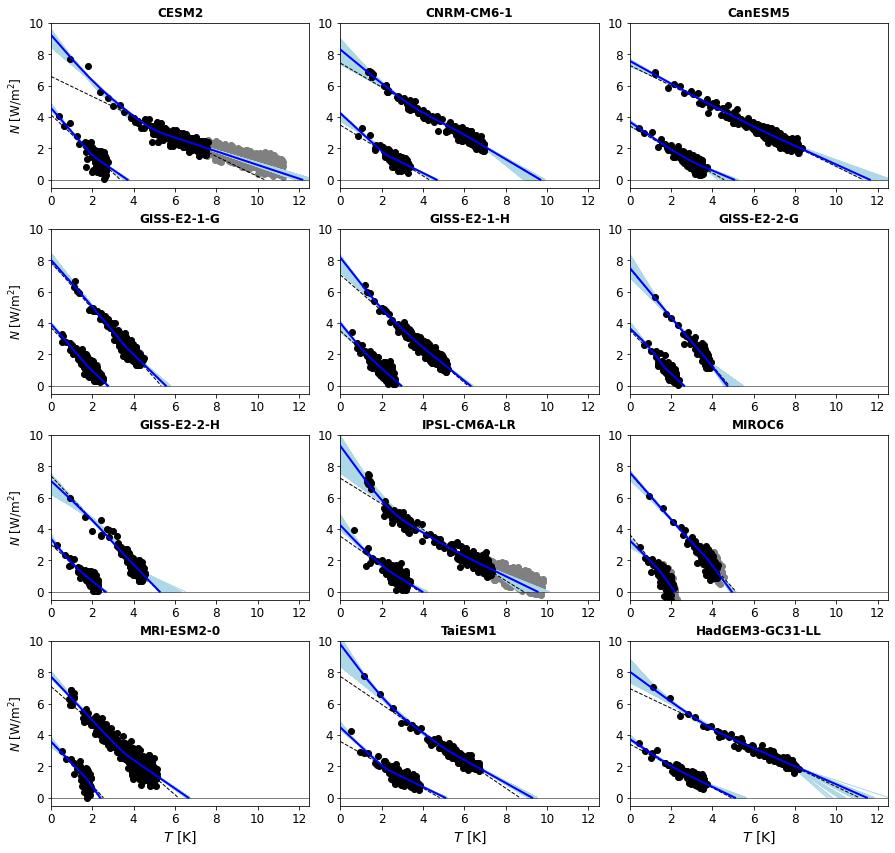

In [23]:

best_parameters = pd.read_csv('../Estimates/best_estimated_parameters_allmembers2xCO2.csv', index_col=0)
models = list(best_parameters.index)

fig, axes = plt.subplots(ncols = 3, nrows = 4, figsize = (20/4*3,18/5*4))
axes = np.concatenate(axes)

years0 = np.arange(0,150+1)

for (j, model) in enumerate(models):
    ax = axes[j]
    if j in [9,10,11]:
        ax.set_xlabel('$T$ [K]', fontsize = 14)
    if j in [0,3,6,9]:
        ax.set_ylabel('$N$ [W/m$^2$]', fontsize = 12)
    ax.tick_params(axis='both', labelsize = 12)
    ax.set_title(model, fontweight = 'bold')
    ax.axhline(0, color='k', linewidth = 0.5) # horizontal lines
    ax.set_xlim(0,12.5)
    ax.set_ylim(-0.5,10);
    
    
    # code specifically for 2xCO2:
    exp = 'abrupt-2xCO2'
    members = find_members(model,exp)
    print(model, members)
    
    gF2x, gT2x, linfit = Gregory_linreg(model, exp, members)
    ax.plot([0, gT2x], linfit,'--',linewidth=1,color = "black", zorder = 2)
    
    for member in members:
        data = load_anom(model, exp, member, length_restriction = None)
        deltaN = data['rsdt'] - data['rsut'] - data['rlut']
        deltaT = data['tas']
        ax.scatter(deltaT[:150], deltaN[:150], linewidth=1, color = "black", zorder = 2)
        ax.scatter(deltaT[150:], deltaN[150:], linewidth=1, color = "gray", zorder = 1)

    # include 1000 fits
    filename = model + '_1000parameters.csv'
    df_par = pd.read_csv('../Estimates/1000parameters_2xCO2_allmembers/' + filename,index_col=0)
    N = len(df_par)    
    years0 = np.arange(0,150+1)

    best_rnorm = np.min(df_par['rnorm']);
    for ii in range(N):
        # load parameters from dataframe:
        taulist = np.array(df_par.loc[ii,'tau1':'tau4'])
        a_n = np.array(df_par.loc[ii,'a_1':'a_4'])
        b_n = np.array(df_par.loc[ii,'b_1':'b_4'])
        F2x = df_par.loc[ii,'F2x']
        T2x = df_par.loc[ii,'T2x']
        rnorm = df_par.loc[ii,'rnorm']

        dim = len(taulist) 
        tas_pred = tas_predictors(years0, taulist)
        toarad_pred = toarad_predictors(years0, taulist)
        Tsum = tas_pred@a_n # sum of all components
        Nsum = toarad_pred@b_n

        # add extra point in equilibrium:
        Tsumext = np.append(Tsum, T2x)
        Nsumext = np.append(Nsum, 0)

        if rnorm == best_rnorm: # best estimate
            ax.plot(Tsumext, Nsumext, linewidth=2, color = "blue", zorder=3);
        else: 
            ax.plot(Tsumext, Nsumext, linewidth=1, color = "lightblue", zorder=1);

    # code specifically for 4xCO2
    exp = 'abrupt-4xCO2'
    members = find_members(model, exp)
    if model == 'GISS-E2-1-G':
        # exclude member which seems to start after year 150
        members.remove('r1i1p1f3')
    print('available members for model', model, members)

    gF2x, gT2x, linfit = Gregory_linreg(model, exp, members)
    ax.plot([0, gT2x*2], linfit,'--',linewidth=1,color = "black", zorder = 2)

    for member in members:
        data = load_anom(model, exp, member, length_restriction = None)
        deltaN = data['rsdt'] - data['rsut'] - data['rlut']
        deltaT = data['tas']

        ax.scatter(deltaT[:150], deltaN[:150], linewidth=1, color = "black", zorder = 2)
        ax.scatter(deltaT[150:], deltaN[150:], linewidth=1, color = "gray", zorder = 1)

    # include 1000 fits
    filename = model + '_1000parameters.csv'
    df_par = pd.read_csv('../Estimates/1000parameters_4xCO2_allmembers/' + filename,index_col=0)
    N = len(df_par)    
    years0 = np.arange(0,150+1)

    best_rnorm = np.min(df_par['rnorm']);
    for ii in range(N):
        # load parameters from dataframe:
        taulist = np.array(df_par.loc[ii,'tau1':'tau4'])
        a_n = np.array(df_par.loc[ii,'a_1':'a_4'])
        b_n = np.array(df_par.loc[ii,'b_1':'b_4'])
        F2x = df_par.loc[ii,'F2x']
        T2x = df_par.loc[ii,'T2x']
        rnorm = df_par.loc[ii,'rnorm']

        dim = len(taulist) 
        tas_pred = tas_predictors(years0, taulist)
        toarad_pred = toarad_predictors(years0, taulist)
        Tsum = tas_pred@a_n # sum of all components
        Nsum = toarad_pred@b_n

        # add extra point in equilibrium:
        Tsumext = np.append(Tsum, 2*T2x)
        Nsumext = np.append(Nsum, 0)

        if rnorm == best_rnorm: # best estimate
            ax.plot(Tsumext, Nsumext, linewidth=2, color = "blue", zorder=3);
        else: 
            ax.plot(Tsumext, Nsumext, linewidth=1, color = "lightblue", zorder=1);

plt.subplots_adjust(hspace=0.25, wspace = 0.12)
plt.savefig('../Figures/TOAimbvsT_allmembers2xCO2vs4xCO2.pdf', format='pdf', dpi=600, bbox_inches="tight")
plt.show()